## Midterm Project Report

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

print('number of data points:',df.shape[0] + test.shape[0])
df.shape

number of data points: 1309


(891, 12)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

In [95]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

By counting the number of unique elements in each column, we can conclude that “PassengerId” and “Name” features are unique for each passenger, so we don’t need to visualize these two columns. By using value_counts, I created bar plots for “Cabin”, “Ticket”, and “Embarked” features.

In [94]:
df[['Survived','Pclass','Age','SibSp','Parch','Fare']].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [93]:
df[['Embarked']].value_counts()

Embarked
S           644
C           168
Q            77
dtype: int64

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

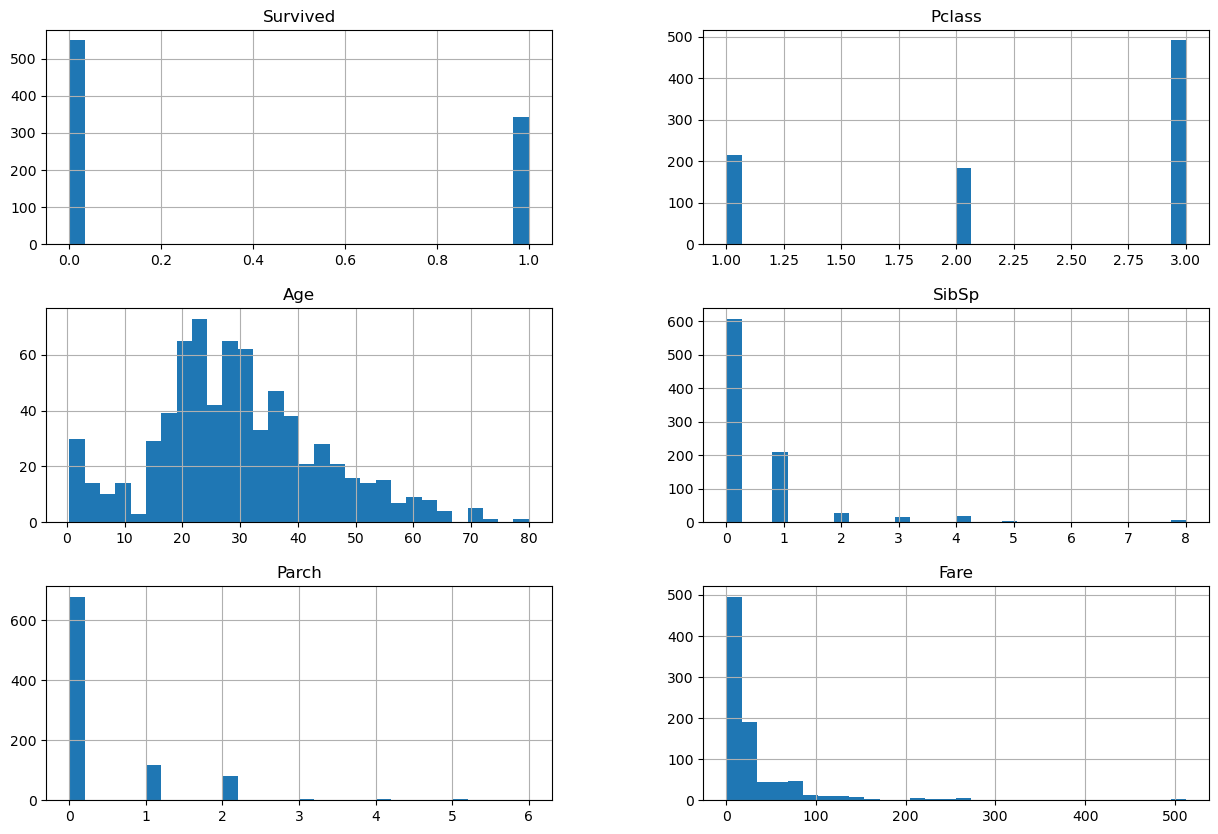

In [90]:
df[['Survived','Pclass','Age','SibSp','Parch','Fare']].hist(figsize = (15,10), bins = 30)

In [114]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<AxesSubplot:title={'center':'Sex'}>

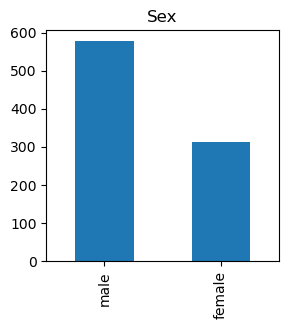

In [91]:
df['Sex'].value_counts().plot(kind = 'bar', title = "Sex", figsize = (3,3))

<AxesSubplot:title={'center':'Embarked'}, ylabel='count'>

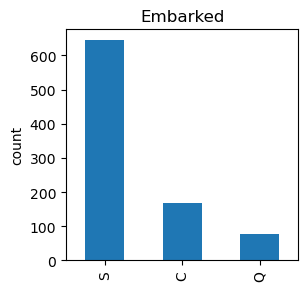

In [102]:
df['Embarked'].value_counts().plot(kind = 'bar', title = "Embarked", figsize = (3,3),ylabel ="count")

<AxesSubplot:title={'center':'Cabin'}, ylabel='count'>

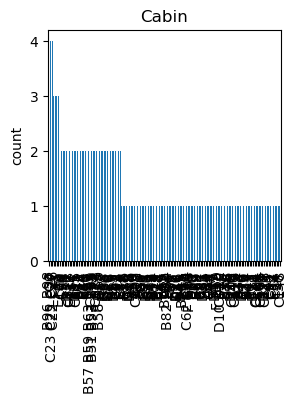

In [99]:
df['Cabin'].value_counts().plot(kind = 'bar', title = "Cabin", figsize = (3,3), ylabel ="count")

<AxesSubplot:title={'center':'Ticket'}, ylabel='count'>

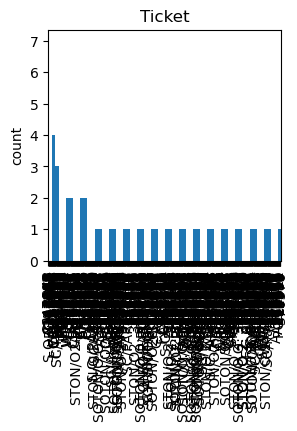

In [100]:
df['Ticket'].value_counts().plot(kind = 'bar', title = "Ticket", figsize = (3,3),ylabel ="count")


Since "Name" is unique, we don't have to visualize them.

Text(0.5, 1.0, 'Bar plot or Survived')

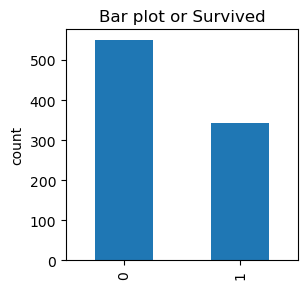

In [101]:
df['Survived'].value_counts().plot(kind = 'bar', title = "Survived", figsize = (3,3),ylabel ="count")
plt.title('Bar plot or Survived')

In [113]:
print((df.loc[(df['Survived'] == 0)].shape[0])/(df.shape[0]))
print((df.loc[(df['Survived'] == 1)].shape[0])/(df.shape[0]))

0.6161616161616161
0.3838383838383838


<AxesSubplot:title={'center':'Fare'}, xlabel='Pclass'>

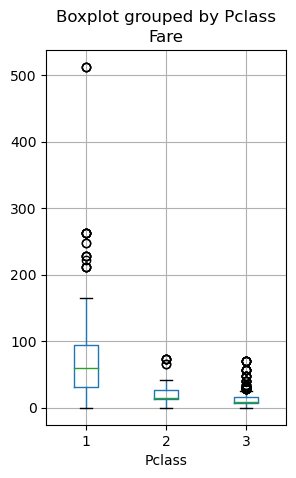

In [43]:
df.boxplot(column = 'Fare', by = 'Pclass', figsize = (3,5))

Text(0.5, 1.0, 'Boxplot of Fare grouped by Embarked and Pclass')

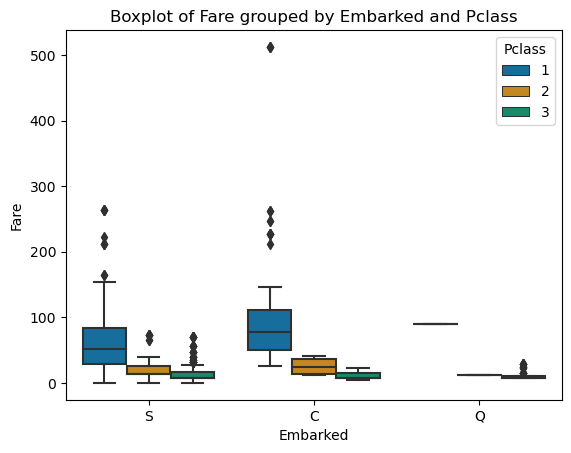

In [79]:
sns.boxplot(y = 'Fare', x = 'Embarked', data = df, palette="colorblind",hue = 'Pclass').set_title("Boxplot of Fare grouped by Embarked and Pclass")


Text(0.5, 1.0, 'Correlation Heatmap between numerical features')

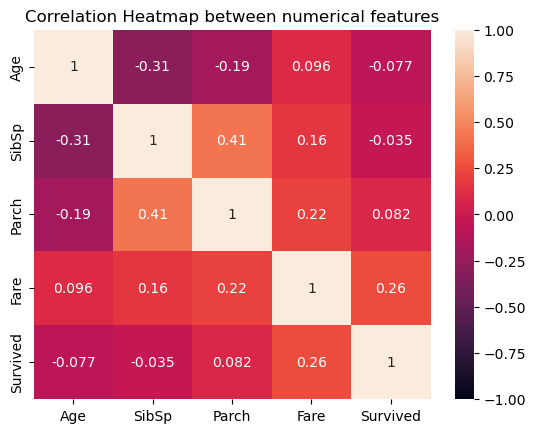

In [115]:
df_num = df[["Age","SibSp","Parch","Fare","Survived"]]
ax = plt.axes()
sns.heatmap(df_num.corr(method='pearson', min_periods=1),vmin=-1,vmax=1,annot=True)
ax.set_title('Correlation Heatmap between numerical features')

/var/folders/gn/cyzt_cl51h9ghmxw5hg3hc8w0000gn/T/ipykernel_98874/2965661710.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.loc[(df['Survived'] == 0), 'Fare'], color = 'blue', shade = True, label = 'Not survived')
/var/folders/gn/cyzt_cl51h9ghmxw5hg3hc8w0000gn/T/ipykernel_98874/2965661710.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.loc[(df['Survived'] == 1), 'Fare'], color = 'green', shade = True, label = 'Survived')


Text(0.5, 1.0, 'Fare Distribution Survived vs Non Survived')

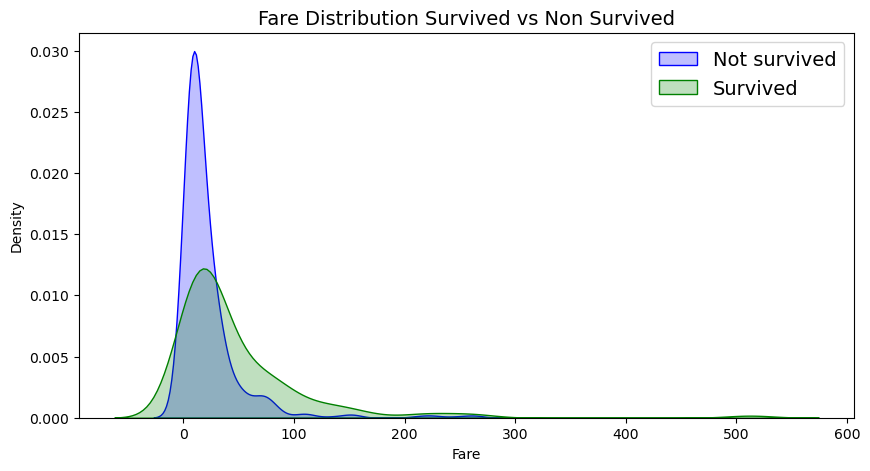

In [73]:
fig = plt.figure(figsize=(10,5),)
ax = sns.kdeplot(df.loc[(df['Survived'] == 0), 'Fare'], color = 'blue', shade = True, label = 'Not survived')
ax = sns.kdeplot(df.loc[(df['Survived'] == 1), 'Fare'], color = 'green', shade = True, label = 'Survived')
ax.legend(fontsize = 14)
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 14)

Text(0.5, 0.98, 'Age distribution Survived vs Non Survived')

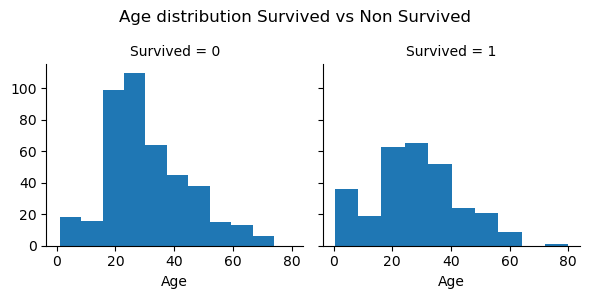

In [86]:
ax= sns.FacetGrid(df, col = 'Survived').map(plt.hist, 'Age')
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle("Age distribution Survived vs Non Survived")

### Data preprocessing

In [136]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = df[['Survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(len(X_train))
print(len(X_test))

623
268


In [135]:
continuous = ['Age','SibSp','Parch','Fare']
categorical = ['Sex','Embarked']
ordinal = ['Pclass']

In [144]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

onehot_ftrs = ['Sex','Embarked']
std_ftrs = ['Age','SibSp','Parch','Fare']
ordinal_ftrs = ['Pclass']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('ordinal', OrdinalEncoder(), ordinal_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_prep = clf.fit_transform(X_train)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
X_train_prep

(623, 7)
(623, 11)


array([[ 0.        ,  1.        ,  0.        , ..., -0.47416141,
         1.99885349,  0.98099823],
       [ 0.        ,  1.        ,  0.        , ..., -0.47416141,
        -0.47932706, -0.46963364],
       [ 1.        ,  0.        ,  0.        , ...,  0.34868694,
         0.75976322, -0.40613632],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.17153529,
        -0.47932706, -0.34778742],
       [ 1.        ,  0.        ,  0.        , ...,  0.34868694,
         1.99885349,  1.72907416],
       [ 0.        ,  1.        ,  0.        , ..., -0.47416141,
         0.75976322,  0.8913508 ]])

In [137]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


### Prepocessing